<a href="https://colab.research.google.com/github/yuvalBerghaus/Sense-Eye/blob/main/sense_eye_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import json

# Load the JSON data from a file or API
# Open the JSON file and load its contents into a Python object
with open('traces.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame.from_dict(data, orient='columns')
df = df.dropna(subset=['gameId'])
len(df)

1455

In [19]:

import pandas as pd


# Assuming you have the data in a DataFrame named 'df'

df = df[df['properties'].apply(lambda x: 'holdsBall' in x if isinstance(x, dict) else False)]

len(df)
df

,gameId,class,properties
1,2023-05-07_22:19:35,person,"{'holdsBall': False, 'x': 552, 'y': 141, 'sigh..."
2,2023-05-07_22:19:35,person,"{'holdsBall': True, 'x': 481, 'y': 357, 'sight..."
4,2023-05-07_22:19:35,person,"{'holdsBall': False, 'x': 552, 'y': 141, 'sigh..."
5,2023-05-07_22:19:35,person,"{'holdsBall': True, 'x': 481, 'y': 357, 'sight..."
7,2023-05-07_22:19:35,person,"{'holdsBall': True, 'x': 552, 'y': 141, 'sight..."
...,...,...,...
1448,2023-05-07_22:19:35,person,"{'holdsBall': True, 'x': 672, 'y': 261, 'sight..."
1449,2023-05-07_22:19:35,person,"{'holdsBall': True, 'x': 673, 'y': 260, 'sight..."
1450,2023-05-07_22:19:35,person,"{'holdsBall': False, 'x': 723, 'y': 121, 'sigh..."
1452,2023-05-07_22:19:35,person,"{'holdsBall': True, 'x': 673, 'y': 260, 'sight..."


# Analysis of Ball-Holding Percentage for Players in Games
This code analyzes data about different games and the players within them. It calculates the percentage of time each player holds the ball during the game and presents it visually using histograms. This helps us understand which players have a higher ball-holding percentage and provides insights into player performance during the games.






Game ID: 2023-05-07_22:19:35
HoldsBall percentage for each ID:
ID: 0, Percentage: 8%
ID: 2, Percentage: 25%
ID: 1, Percentage: 16%
ID: 3, Percentage: 2%
Color with the highest percentage: orange




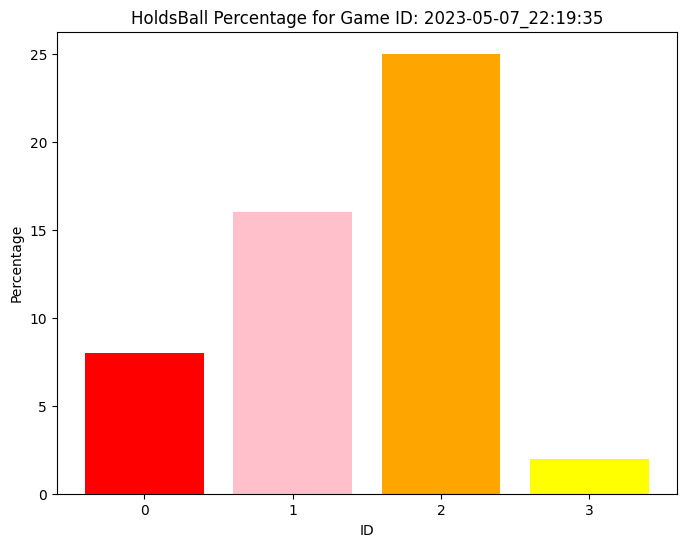

In [74]:
import matplotlib.pyplot as plt
from collections import defaultdict

defined_strings = {0: 'red', 1: 'pink', 2: 'orange', 3: 'yellow'}
default_color = 'gray'  # Default color for IDs not found in defined_strings
next_numeric_id = 2  # Start assigning numeric IDs from 4 onwards

# Step 1: Group objects by gameId
game_groups = defaultdict(list)
for _, row in df.iterrows():
    game_groups[row['gameId']].append(row)

# Step 2: Calculate holdsBall percentage for each id in each gameId group
for game_id, group in game_groups.items():
    id_counts = defaultdict(int)
    total_objects = len(group)

    # Step 3: Count occurrences of holdsBall being true for each id
    for row in group:
        properties = row['properties']
        if 'holdsBall' in properties and properties['holdsBall'] and 'id' in properties:
            id_value = properties['id']
            if not isinstance(id_value, int):
                if id_value not in defined_strings:
                    defined_strings[id_value] = next_numeric_id
                    next_numeric_id += 1
                id_value = defined_strings[id_value]
            id_counts[id_value] += 1

    print(f"Game ID: {game_id}")
    print("HoldsBall percentage for each ID:")
    hash_map = {}  # Hash map to store ID-percentage associations
    max_percentage = 0
    max_color = None
    for id_value, count in id_counts.items():
        percentage = int(count / total_objects * 100)
        hash_map[id_value] = percentage
        if percentage > max_percentage:
            max_percentage = percentage
            max_color = defined_strings.get(id_value, default_color)
        print(f"ID: {id_value}, Percentage: {percentage}%")
    # Prepare data for plotting
    ids = list(hash_map.keys())
    percentages = list(hash_map.values())

    # Plotting the chart
    plt.figure(figsize=(8, 6))
    plt.bar(ids, percentages, color=[defined_strings.get(id_value, default_color) for id_value in ids])
    plt.xlabel('ID')
    plt.ylabel('Percentage')
    plt.title(f"HoldsBall Percentage for Game ID: {game_id}")
    
    # Set the x-axis ticks to display only whole numbers
    plt.xticks(range(min(ids), max(ids) + 1))

    plt.show()


# The player with the highest percentage of holding the ball is

In [86]:
from IPython.display import display, HTML

display(HTML(f"<h1>{max_color}</h1>"))


# Analyzing Ball Movement Patterns: Insights from Heatmap Analysis in a Game Session
The following heatmap displays the location of a ball during a game session. The heatmap helps us to understand the patterns in the ball's movement and identify areas on the field where the ball tends to be located most frequently. By analyzing this data, we can gain valuable insights into the game and improve our understanding of the ball's trajectory throughout the match

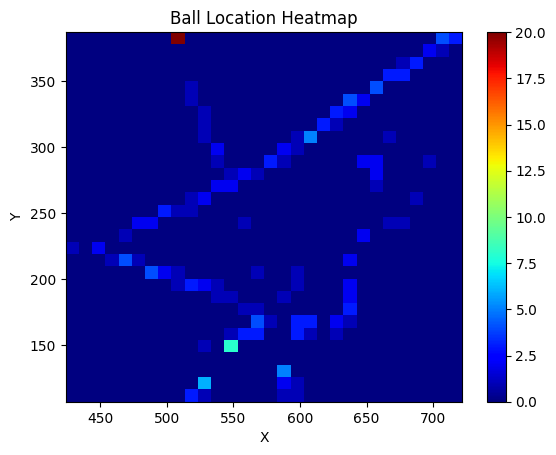

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON data from a file or API
# Open the JSON file and load its contents into a Python object
with open('traces.json', 'r') as f:
    data = json.load(f)

# Extract the x-y coordinates for each ball location
coords = []
for d in data:
    if d["class"] == "ball":
        coords.append([d["properties"]["x"], d["properties"]["y"]])

# Create a heatmap using Matplotlib
if len(coords) > 0:
    coords = np.array(coords)
    plt.hist2d(coords[:, 0], coords[:, 1], bins=30, cmap=plt.cm.jet)
    plt.colorbar()
    plt.title("Ball Location Heatmap")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
else:
    print("No ball locations found in the data")


# Analyzing Player Movement: Heatmap of Player Locations During Game Session
This visualization displays a heatmap of the players' locations on the field during the game session. By analyzing this heatmap, we can gain insights into the patterns of player movement and identify areas of the field where players tend to be clustered or spread out. This information can be useful for coaches and analysts in developing game strategies and improving player performance

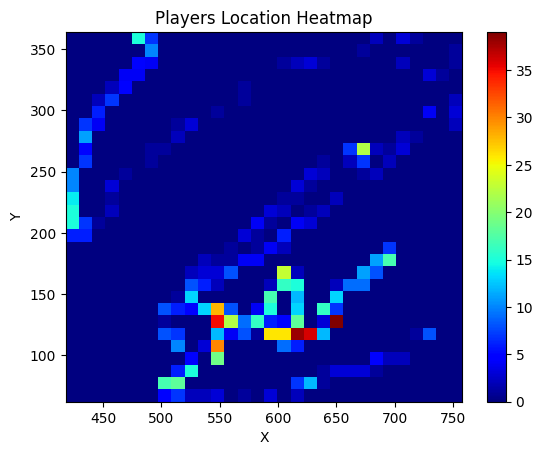

In [ ]:
# Extract the x-y coordinates for each ball location
coords = []
for d in data:
    if d["class"] == "person":
        coords.append([d["properties"]["x"], d["properties"]["y"]])

# Create a heatmap using Matplotlib
if len(coords) > 0:
    coords = np.array(coords)
    plt.hist2d(coords[:, 0], coords[:, 1], bins=30, cmap=plt.cm.jet)
    plt.colorbar()
    plt.title("Players Location Heatmap")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
else:
    print("No players locations found in the data")

#  Analyzing Player Movement and Patterns with 2D Heatmaps during Game Sessions
In the following heatmap, we can observe the location of the players in the field during different game sessions. The heatmap displays the coordinates of the players' positions on the x-axis and y-axis, representing a 2D view of the field. By analyzing the heatmap, we can identify the regions of the field where players tend to be more active, and where they tend to move less frequently. This information can be used to improve team strategy, understand player behavior, and optimize gameplay tactics.

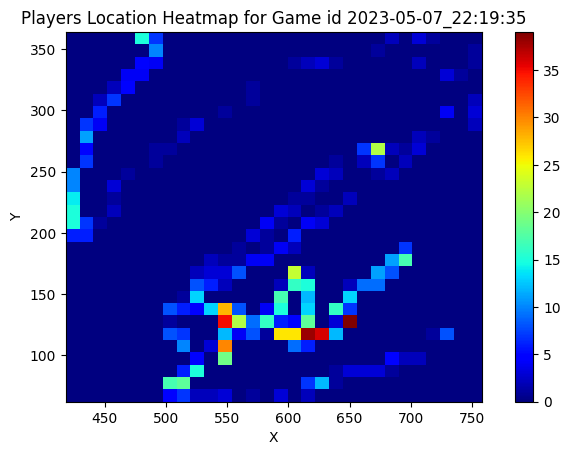

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the JSON data from a file or API
with open('traces.json', 'r') as f:
    data = json.load(f)

# Load the background image
img = Image.open('field.jpeg')
# Create a figure and axis objects with the same size as the background image
fig, ax = plt.subplots(figsize=(img.width/100, img.height/100))

# Plot the background image
ax.imshow(img)

# Set the x and y limits of the axis to match the dimensions of the image
ax.set_xlim([0, img.width])
ax.set_ylim([img.height, 0])

# Group the data by gameId
groups = {}
for d in data:
    gameId = d["gameId"]
    if gameId not in groups:
        groups[gameId] = []
    if d["class"] == "person":
        groups[gameId].append([d["properties"]["x"], d["properties"]["y"]])

# Create a heatmap for each group
for gameId, coords in groups.items():
    if len(coords) > 0:
        coords = np.array(coords)
        # Set the extent of the heatmap to match the image dimensions
        im = ax.hist2d(coords[:, 0], coords[:, 1], bins=30, cmap=plt.cm.jet)[3]
        plt.colorbar(im, ax=ax)
        ax.set_title(f"Players Location Heatmap for Game id {gameId}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        plt.show()
    else:
        print(f"No players locations found for Game {gameId}")


# Analyzing Game Sessions with Detailed Heatmaps
With the addition of the frame, we can now visualize the actual heatmap of the real frame in the game. This gives us a more accurate understanding of where the players and the ball are located in the field, allowing us to dive deeper into analyzing the game sessions. By examining the heatmap with the frame, we can gain insights into the patterns and tendencies of the players' movements and the ball's trajectory. This added level of detail can provide valuable information for coaches and analysts in improving team performance and strategy.

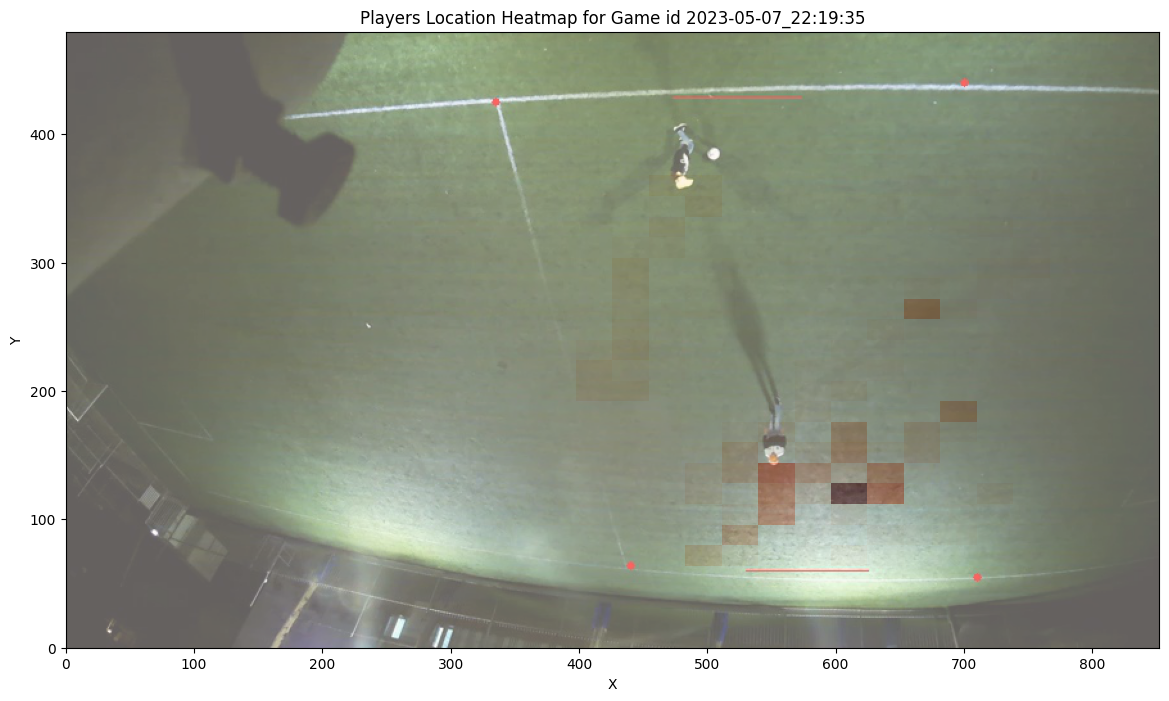

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the JSON data from a file or API
with open('traces.json', 'r') as f:
    data = json.load(f)

# Load the background image
img = Image.open('field.jpeg')

# Create a figure and axis objects with a larger size
fig, ax = plt.subplots(figsize=(16, 8))
# Set the aspect ratio of the image to match the dimensions of the plot
aspect = img.width / float(img.height)
ax.set_aspect(aspect)

# Plot the background image
ax.imshow(img)

# Group the data by gameId
groups = {}
for d in data:
    gameId = d["gameId"]
    if gameId not in groups:
        groups[gameId] = []
    if d["class"] == "person":
        groups[gameId].append([d["properties"]["x"], d["properties"]["y"]])

# Create a heatmap for each group
for gameId, coords in groups.items():
    if len(coords) > 0:
        coords = np.array(coords)
        # Set the range of the heatmap to match the image dimensions
        im, _, _, _ = ax.hist2d(coords[:, 0], coords[:, 1], bins=30, cmap=plt.cm.Reds, alpha=0.4, range=[[0, img.width], [0, img.height]])
        ax.set_title(f"Players Location Heatmap for Game id {gameId}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        plt.show()
    else:
        print(f"No players locations found for Game {gameId}")


# The Ball's locations in frame


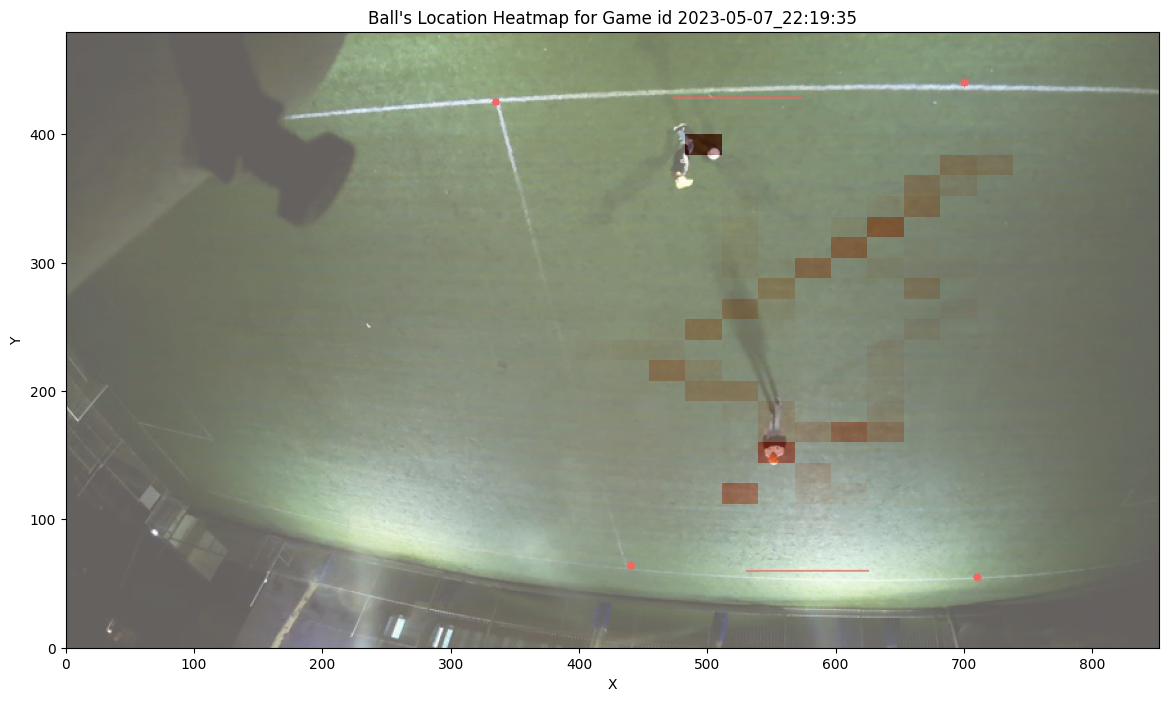

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the JSON data from a file or API
with open('traces.json', 'r') as f:
    data = json.load(f)

# Load the background image
img = Image.open('field.jpeg')

# Create a figure and axis objects with a larger size
fig, ax = plt.subplots(figsize=(16, 8))

# Set the aspect ratio of the image to match the dimensions of the plot
aspect = img.width / float(img.height)
ax.set_aspect(aspect)

# Plot the background image
ax.imshow(img)

# Group the data by gameId
groups = {}
for d in data:
    gameId = d["gameId"]
    if gameId not in groups:
        groups[gameId] = []
    if d["class"] == "ball":
        groups[gameId].append([d["properties"]["x"], d["properties"]["y"]])

# Create a heatmap for each group
for gameId, coords in groups.items():
    if len(coords) > 0:
        coords = np.array(coords)
        # Set the range of the heatmap to match the image dimensions
        im, _, _, _ = ax.hist2d(coords[:, 0], coords[:, 1], bins=30, cmap=plt.cm.Reds, alpha=0.4, range=[[0, img.width], [0, img.height]])
        ax.set_title(f"Ball's Location Heatmap for Game id {gameId}")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        plt.show()
    else:
        print(f"No balls locations found for Game {gameId}")


In [ ]:
import pandas as pd
import json

# Load JSON data from file
with open('traces.json', 'r') as f:
    data = json.load(f)

# Create a list of dictionaries from the JSON data
rows = []
for obj in data:
    row = {'gameId': obj['gameId'], 'class': obj['class']}
    row.update(obj['properties'])
    rows.append(row)

# Create a pandas dataframe from the list of dictionaries
df = pd.DataFrame(rows)



# Exploring Correlations between Different Fields: Uncovering Patterns and Relationships in the Data
In this analysis, we are investigating whether there is any correlation between different fields. By examining the data, we can identify any patterns or relationships that may exist between the variables being studied. This information can be valuable in understanding the underlying structure of the data and may provide insights into how these fields are related to each other.

In [ ]:
correlations = df.corr()
print(correlations)

                       x         y  sightDirection  center_y  team
x               1.000000 -0.107172        0.129453 -0.155059   NaN
y              -0.107172  1.000000        0.023951  0.998898   NaN
sightDirection  0.129453  0.023951        1.000000  0.027424   NaN
center_y       -0.155059  0.998898        0.027424  1.000000   NaN
team                 NaN       NaN             NaN       NaN   NaN


<ipython-input-11-4303e8afd7ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


In [ ]:
params = ["x", "y", "sightDirection", "center_y", "review_taste"]
corr = df[params].corr()
import numpy as np
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, mask=mask)